<a href="https://colab.research.google.com/github/PKpacheco/pre_process_dados_puc/blob/main/aula_1_pre_proces_dados_reducao_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#analise de componentes principais com ovjetivo de reducao de dimensionalidade

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import missingno as msno
from sklearn.preprocessing import StandardScaler
import matplotlib as plt
from sklearn.preprocessing import scale


In [2]:
np.random.seed(42)

In [4]:
dados=pd.read_csv('heart.csv')

In [5]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dados.columns = ['idade','sexo','tipo_dor', 'pressao_arterial', 'colesterol', 'acucar_jejum', 'eletro', 'batimentos', 'dor_peito', 'st_depress', 'slope', 'num_vasos', 'categoria', 'tem_doenca']


In [7]:
dados.head()

,idade,sexo,tipo_dor,pressao_arterial,colesterol,acucar_jejum,eletro,batimentos,dor_peito,st_depress,slope,num_vasos,categoria,tem_doenca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
dados.isnull().sum()


idade               0
sexo                0
tipo_dor            0
pressao_arterial    0
colesterol          0
acucar_jejum        0
eletro              0
batimentos          0
dor_peito           0
st_depress          0
slope               0
num_vasos           0
categoria           0
tem_doenca          0
dtype: int64

In [8]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)

In [15]:
dados_scaled = scale(dados.drop(['sexo'], axis =1))

In [18]:
pd.DataFrame(dados_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,-1.093459
299,-1.033002,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.093459
300,1.503641,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,-1.093459
301,0.290464,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,-1.093459


In [19]:
pca.fit(dados_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
print('Eigenvalues =', pca.explained_variance_)
 #devemos selecionar os valores acimade 1 

Eigenvalues = [3.27852912 1.49357842 1.21118069 1.03212404 0.99360876 0.95871592
 0.84890116 0.7682736  0.71000275 0.54902254 0.43483744 0.39134261
 0.37292931]


In [23]:
x = np.arange(pca.explained_variance_[0]) + 1

In [27]:
import matplotlib.pyplot as plt 

In [29]:
x = np.arange(pca.explained_variance_.shape[0]) + 1

[]

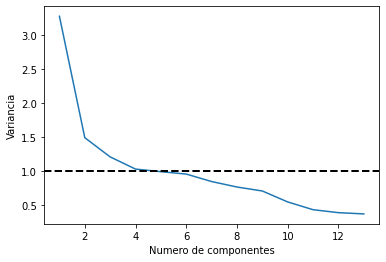

In [30]:
plt.plot(x, pca.explained_variance_)
plt.axhline(1.0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Numero de componentes')
plt.ylabel('Variancia')
plt.plot()


[]

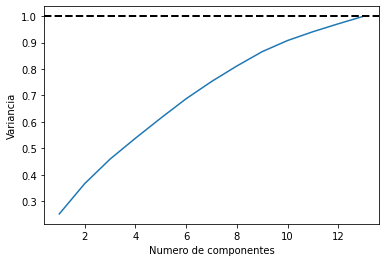

In [34]:
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.axhline(1.0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Numero de componentes')
plt.ylabel('Variancia')
plt.plot()

In [39]:
pca_fitted = PCA(n_components=2, random_state=42)
new_dataset = pd.DataFrame(pca_fitted.fit_transform(dados_scaled))
new_dataset

,0,1
0,-0.089290,3.152459
1,-0.908248,-0.513463
2,-1.908992,-0.414148
3,-1.996661,-0.348811
4,-0.564453,-0.625705
...,...,...
298,1.666119,-1.315226
299,-0.248614,-0.931263
300,2.609209,1.149352
301,2.061202,-2.057065


In [43]:
pd.DataFrame(pca_fitted.components_.T * np.sqrt(pca_fitted.explained_variance_),
             columns=['PC1', 'PC2'],
             index=dados.drop(['sexo'], axis=1).columns.values)

,PC1,PC2
idade,0.482136,0.495620
tipo_dor,-0.500438,0.445330
pressao_arterial,0.280617,0.595104
colesterol,0.191027,0.335945
acucar_jejum,0.095511,0.526928
eletro,-0.203609,-0.333722
batimentos,-0.674003,0.101798
dor_peito,0.606517,-0.309787
st_depress,0.675282,-0.001970
slope,-0.598956,0.018802
